Pripremamo podatke koje koristimo u analizi

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.stats import boxcox

In [61]:
# Define the data
data_dict = {
    'Year': [1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894],
    'GC': [0, 2, 2, 1, 0, 0, 1, 1, 0, 3, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1],
    'C1': [0, 0, 0, 2, 0, 3, 0, 2, 1, 0, 0, 1, 1, 1, 0, 2, 0, 3, 0, 0],
    'C2': [0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0],
    'C3': [0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0],
    'C4': [0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0],
    'C5': [0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    'C6': [0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0],
    'C7': [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 3, 1, 1, 2, 0, 3, 0, 0],
    'C8': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0],
    'C9': [1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1],
    'C10': [0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0],
    'C11': [0, 0, 0, 0, 0, 4, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 3, 0, 1, 1],
    'C14': [1, 0, 2, 1, 1, 3, 0, 4, 3, 0, 1, 1, 1, 1, 2, 2, 0, 1, 3, 1],
    'C15': [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0]
}

data = pd.DataFrame(data_dict)

# Save to CSV
data.to_csv('prussian_horse_kick_data.csv', index=False)

In [62]:
data['Total'] = data.drop(columns=['Year']).sum(axis=1)

box_cox_transformed, lambda_ = boxcox(data['Total']) 
print(lambda_)

0.19792501113536254


Originalna asimetrija: 0.5732683196011721


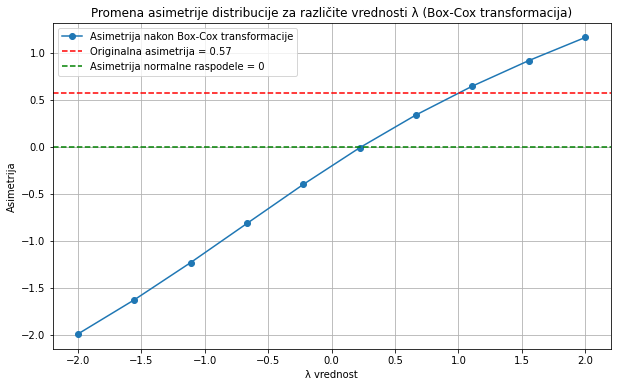

Optimalna vrednost λ prema boxcox funkciji: 0.19792501113536254


In [64]:
lambdas = np.linspace(-2, 2, 10)
skews = []

# Izračunaj asimetriju za svaku vrednost λ
for lam in lambdas:
    if lam == 0.00:
        transformed_data = np.log(data['Total'])
    else:
        transformed_data = boxcox(data['Total'], lmbda=lam)
    skewness = skew(transformed_data)
    skews.append(skewness)

# Originalna asimetrija (Skewness)
original_skew = skew(data['Total'])
print('Originalna asimetrija: {}'.format(original_skew))

# Prikaži rezultate na grafiku
plt.figure(figsize=(10, 6))
plt.plot(lambdas, skews, marker='o', label='Asimetrija nakon Box-Cox transformacije')
plt.axhline(y=original_skew, color='red', linestyle='--', label=f'Originalna asimetrija = {original_skew:.2f}')
plt.axhline(y=0, color='green', linestyle='--', label='Asimetrija normalne raspodele = 0')
plt.title('Promena asimetrije distribucije za različite vrednosti λ (Box-Cox transformacija)')
plt.xlabel('λ vrednost')
plt.ylabel('Asimetrija')
plt.legend()
plt.grid(True)
plt.show()

# Primeniti automatski odabranu optimalnu vrednost λ
optimal_transformed_data, optimal_lambda = boxcox(data['Total'])
print(f'Optimalna vrednost λ prema boxcox funkciji: {optimal_lambda}')

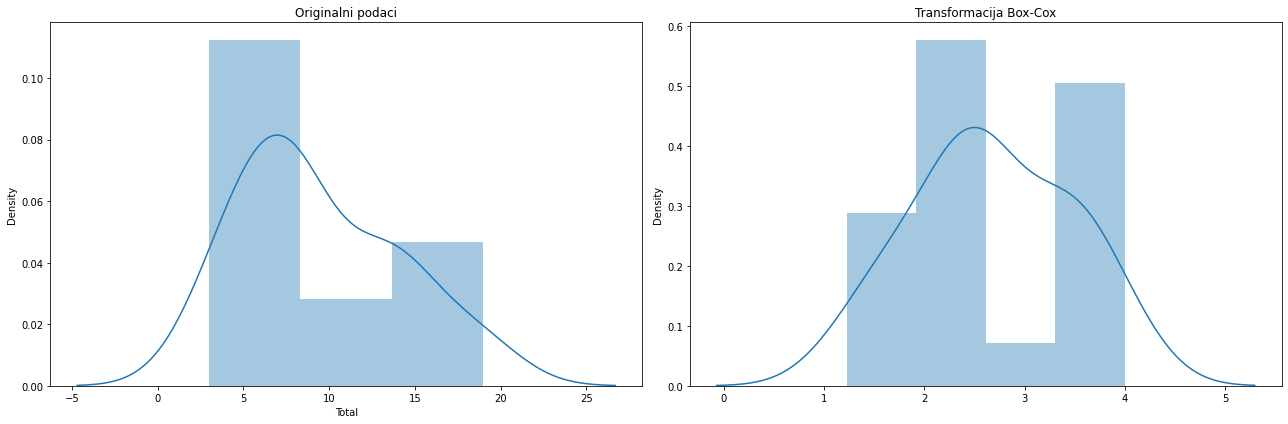

In [63]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))

# # Histogram originalnih podataka
# plt.subplot(1, 2, 1)
# plt.hist(data['Total'], bins=10, edgecolor='black')
# plt.title('Originalni Podaci')

# # Histogram Box-Cox transformisanih podataka
# plt.subplot(1, 2, 2)
# plt.hist(box_cox_transformed, bins=10, edgecolor='black')
# plt.title('Box-Cox Transformisani Podaci')

# plt.show()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.distplot(data['Total'], ax=axes[0], kde=True)
axes[0].set_title('Originalni podaci')

sns.distplot(box_cox_transformed, ax=axes[1], kde=True)
axes[1].set_title('Transformacija Box-Cox')

plt.tight_layout()
plt.show()

In [ ]:
# per unit calculations

## Uvozimo podatke

In [23]:
# potrebne biblioteke
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
import os

# formiramo putanju do fajla
current_dir = os.getcwd()

#file_name = 'data/national_museum_visits.csv'
file_name = 'data/air_time.csv'
file_path = os.path.join(current_dir, file_name)

try:
    data = pd.read_csv(file_path)
    print("File loaded successfully")
except FileNotFoundError as e:
    print(f"Error: {e}")

data.head()

print('Total data points:{}'.format(len(data['AIR_TIME'])))

File loaded successfully
Total data points:12657


Posmatraćemo kolonu koja broji ukupan broj poseta muzeju u jednom danu.
Ispitujemo da li imamo negativne ili nula vrednosti u skupu pdataka.

In [49]:
total_column = data['AIR_TIME']

len(data[total_column == 0]), len(data[total_column < 0])

(0, 0)

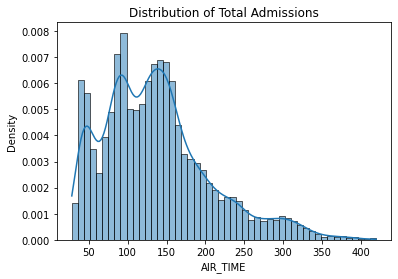

0.9008388414372591


In [50]:
from scipy.stats import skew

# pravimo histogram
sns.histplot(total_column, stat='density', bins=50, kde=True)
plt.title('Distribution of Total Admissions')

plt.show()

skew_val = skew(total_column, axis=0, bias=True)
print(skew_val)

Kao sto ocigledno mozemo videti, uzorak **ne prati normalnu raspodelu**. 

Ima vise vrednosti u levoj polovini grafika, tj ima pozitivnu (desnu asimetriju), sto potvrđuje i izračunata vrednost skew > 0.

## Box-Cox transformacija

Box-Cox transformacija je stepenasta transformacija koja koristi parametar $λ$ da prilagodi raspodelu podataka. Različite vrednosti lambda omogućavaju različite transformacije.

S obzirom na to da λ može uzeti gotovo beskonačan broj vrednosti, teoretski možemo odrediti transformaciju da bude maksimalno efikasna u približavanju varijable normalnoj distribuciji, bez obzira na to da li je negativno ili pozitivno asimetrična. 

Takođe, kao što je gore pomenuto, ova porodica transformacija uključuje mnoge tradicionalne transformacije:

 - λ = 1.00: daje rezultate identične originalnim podacima
 - λ = 0.50: transformacija pomoću kvadratnog korena
 - λ = 0.33: transformacija pomoću kubnog korena
 - λ = 0.00: transformacija pomoću prirodnog logaritma
 - λ = -1.00: transformacija pomoću recipročne (inverzne) vrednosti

Navedene transformacije upoređujemo u [svesci](04_data_transformations.ipynb).

Funkcija boxcox iz biblioteke **scipy.stats** omogućava automatsko određivanje optimalne vrednosti λ koja **maksimizuje normalnost transformisanih podataka**. Kada pozovemo funkciju bez eksplicitnog zadavanja vrednosti λ, ona će pronaći najbolju moguću vrednost koja minimizuje asimetriju i približava distribuciju normalnoj.

Originalna asimetrija: 0.9008388414372591


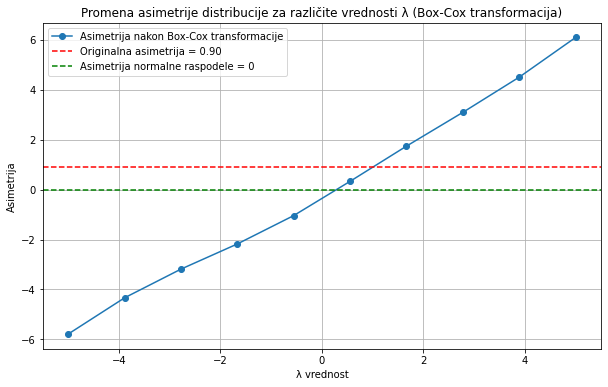

Optimalna vrednost λ prema boxcox funkciji: 0.2807713393426487


In [52]:
# racunamo asimetriju za razlicite vrednosti lambda
lambdas = np.linspace(-5, 5, 10)
skews = []

# Izračunaj asimetriju za svaku vrednost λ
for lam in lambdas:
    if lam == 0.00:
        transformed_data = np.log(total_column)
    else:
        transformed_data = boxcox(total_column, lmbda=lam)
    skewness = skew(transformed_data)
    skews.append(skewness)

# Originalna asimetrija (Skewness)
original_skew = skew(total_column)
print('Originalna asimetrija: {}'.format(original_skew))

# Prikaži rezultate na grafiku
plt.figure(figsize=(10, 6))
plt.plot(lambdas, skews, marker='o', label='Asimetrija nakon Box-Cox transformacije')
plt.axhline(y=original_skew, color='red', linestyle='--', label=f'Originalna asimetrija = {original_skew:.2f}')
plt.axhline(y=0, color='green', linestyle='--', label='Asimetrija normalne raspodele = 0')
plt.title('Promena asimetrije distribucije za različite vrednosti λ (Box-Cox transformacija)')
plt.xlabel('λ vrednost')
plt.ylabel('Asimetrija')
plt.legend()
plt.grid(True)
plt.show()

# Primeniti automatski odabranu optimalnu vrednost λ
optimal_transformed_data, optimal_lambda = boxcox(total_column)
print(f'Optimalna vrednost λ prema boxcox funkciji: {optimal_lambda}')

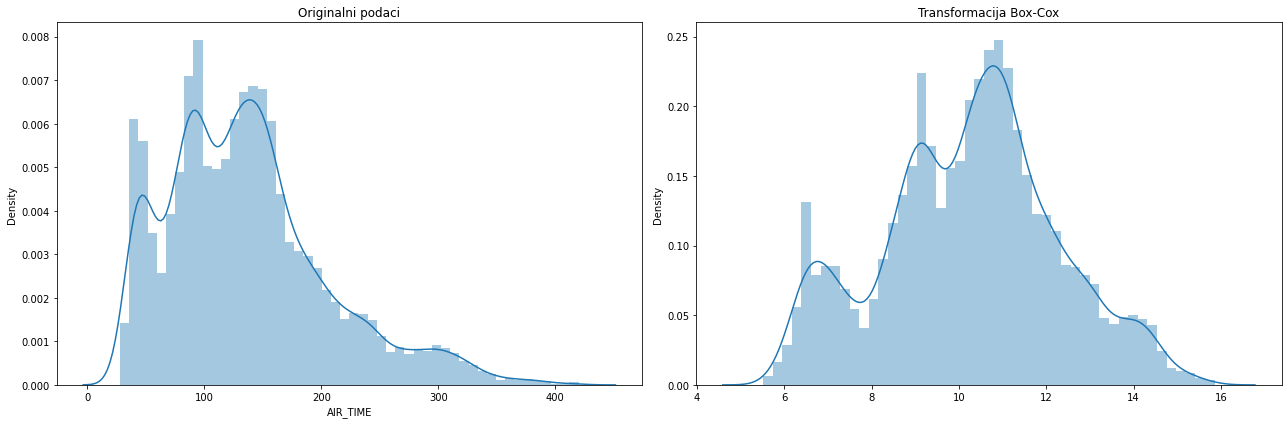

In [54]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.distplot(total_column, ax=axes[0], kde=True)
axes[0].set_title('Originalni podaci')

sns.distplot(optimal_transformed_data, ax=axes[1], kde=True)
axes[1].set_title('Transformacija Box-Cox')

plt.tight_layout()
plt.show()